In [63]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np
import statsmodels.api as sm
from ISLP.models import summarize
import warnings
warnings.filterwarnings('ignore')

In [64]:
merged_data = pd.read_csv('../data/processed/merged_data.csv')

print(merged_data.describe(include='all'))

print(merged_data.info())

       Province_x Month-Year  Unemployment Rate Minimum Wage
count        6391       6391        6391.000000         6086
unique         11        581                NaN          174
top        Canada   Jan-1976                NaN        $4.00
freq          581         11                NaN          395
mean          NaN        NaN           9.095634          NaN
std           NaN        NaN           3.503424          NaN
min           NaN        NaN           3.200000          NaN
25%           NaN        NaN           6.500000          NaN
50%           NaN        NaN           8.400000          NaN
75%           NaN        NaN          11.200000          NaN
max           NaN        NaN          22.700000          NaN
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6391 entries, 0 to 6390
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Province_x         6391 non-null   object 
 1   Month-Year   

In [65]:
merged_data = pd.read_csv('../data/processed/merged_data.csv')

# ensure datatype is correct
merged_data['Minimum Wage'] = merged_data['Minimum Wage'].replace('[\$,]', '', regex=True).astype(float)
merged_data['Unemployment Rate'] = merged_data['Unemployment Rate'].astype(float)


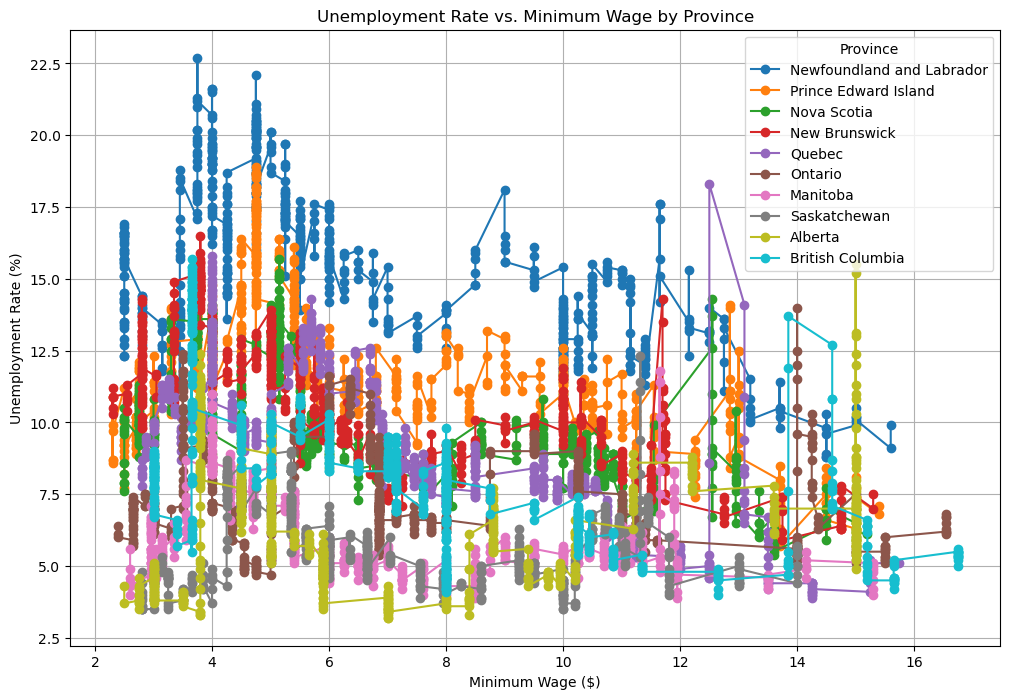

In [66]:

# lets see the plots first
plt.figure(figsize=(12, 8))
for province in merged_data['Province_x'].unique():
    if province != 'Canada': # drop Canada data point from the plot
        province_data = merged_data[merged_data['Province_x'] == province]
        plt.plot(province_data['Minimum Wage'], province_data['Unemployment Rate'], marker='o', label=province)

plt.xlabel('Minimum Wage ($)')
plt.ylabel('Unemployment Rate (%)')
plt.title('Unemployment Rate vs. Minimum Wage by Province')
plt.legend(title='Province')
plt.grid(True)
plt.show()

#it's not very linear, let's test

In [67]:
# Check fo linear relationship b/w min wage and unemployment rate for each province
# Loop through each unique province

# I will drop "Canada" values for now and fill the NaN value

regression_summaries = {}

for province in merged_data['Province_x'].unique():
    if province != 'Canada':
        province_data = merged_data[merged_data['Province_x'] == province]
        
        X = province_data['Minimum Wage']
        y = province_data['Unemployment Rate']
        
        X = sm.add_constant(X)
        
        # Fit the linear regression model
        model = sm.OLS(y, X).fit()
        
        # Save the summary to the dictionary
        regression_summaries[province] = model.summary()
        print(summarize(model))


                 coef  std err       t  P>|t|
const         19.1033    0.197  96.844    0.0
Minimum Wage  -0.5275    0.026 -19.952    0.0
                 coef  std err       t  P>|t|
const         14.4442    0.196  73.561    0.0
Minimum Wage  -0.3696    0.026 -14.265    0.0
                 coef  std err       t  P>|t|
const         12.7686    0.153  83.654    0.0
Minimum Wage  -0.3963    0.020 -19.667    0.0
                 coef  std err        t  P>|t|
const         14.1931    0.140  101.048    0.0
Minimum Wage  -0.4930    0.019  -26.014    0.0
                 coef  std err       t  P>|t|
const         13.7121    0.166  82.391    0.0
Minimum Wage  -0.5989    0.021 -28.978    0.0
                coef  std err      t  P>|t|
const         7.8275    0.154  50.96  0.000
Minimum Wage -0.0571    0.018  -3.15  0.002
                coef  std err       t  P>|t|
const         7.6653    0.146  52.676    0.0
Minimum Wage -0.1967    0.019 -10.355    0.0
                coef  std err       t  P

In [68]:
# Print regression summaries
for province, summary in regression_summaries.items():
    print(f'Regression summary for {province}:')
    print(summary)

Regression summary for Newfoundland and Labrador:
                            OLS Regression Results                            
Dep. Variable:      Unemployment Rate   R-squared:                       0.407
Model:                            OLS   Adj. R-squared:                  0.406
Method:                 Least Squares   F-statistic:                     398.1
Date:                Fri, 21 Jun 2024   Prob (F-statistic):           8.37e-68
Time:                        21:43:30   Log-Likelihood:                -1258.1
No. Observations:                 581   AIC:                             2520.
Df Residuals:                     579   BIC:                             2529.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------

In [69]:
summary.tables[0]

Dep. Variable:,Unemployment Rate,R-squared:,0.375
Model:,OLS,Adj. R-squared:,0.374
Method:,Least Squares,F-statistic:,346.8
Date:,"Fri, 21 Jun 2024",Prob (F-statistic):,5.21e-61
Time:,21:43:30,Log-Likelihood:,-1248.3
No. Observations:,581,AIC:,2501.
Df Residuals:,579,BIC:,2509.
Df Model:,1,,
Covariance Type:,nonrobust,,


In [70]:
summary.tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
const,11.4134,0.198,57.688,0.000,11.025,11.802
Minimum Wage,-0.4426,0.024,-18.623,0.000,-0.489,-0.396


In [71]:
# Recalculate R-squared and P-values accurately from regression summaries
results = []

for province, summary in regression_summaries.items():
    # Extract R-squared and P-value from the regression summary
    r_squared = summary.tables[0].data[0][3]
    p_value = summary.tables[1].data[2][4]
    results.append((province, float(r_squared), float(p_value)))

# Convert the results into a DataFrame
results_df = pd.DataFrame(results, columns=['Province', 'R_squared', 'P_value'])

# Round the values for better readability
results_df['R_squared'] = results_df['R_squared'].round(3)
results_df['P_value'] = results_df['P_value'].round(3)

# tools.display_dataframe_to_user(name="Corrected Regression Analysis Results by Province", dataframe=results_df)

results_df


,Province,R_squared,P_value
0,Newfoundland and Labrador,0.407,0.000
1,Prince Edward Island,0.260,0.000
2,Nova Scotia,0.400,0.000
3,New Brunswick,0.539,0.000
4,Quebec,0.592,0.000
5,Ontario,0.017,0.002
6,Manitoba,0.156,0.000
7,Saskatchewan,0.039,0.000
8,Alberta,0.001,0.435
9,British Columbia,0.375,0.000


### Interpretation of the Results

**Summary of Findings:**

* **Statistical Significance (P-value):**
    
    * All provinces except Alberta have extremely low p-values (0.000), indicating that the relationship between minimum wage and unemployment rate is statistically significant.
    
    * Alberta has a p-value of 0.435, suggesting that there is no statistically significant relationship between minimum wage and unemployment rate in this province.

**Strength of Relationship (R-squared):**

* Quebec: The strongest relationship with an R-squared of 0.592. This means that 59.2% of the variance in the unemployment rate can be explained by the minimum wage.

* New Brunswick: Strong relationship with an R-squared of 0.539.

* Newfoundland and Labrador: Moderate relationship with an R-squared of 0.407.

* Nova Scotia: Moderate relationship with an R-squared of 0.400.

* British Columbia: Moderate relationship with an R-squared of 0.375.

* Prince Edward Island: Weaker relationship with an R-squared of 0.260.

* Manitoba: Weak relationship with an R-squared of 0.156.

* Saskatchewan: Very weak relationship with an R-squared of 0.039.

* Ontario: Very weak relationship with an R-squared of 0.017.

* Alberta: Negligible relationship with an R-squared of 0.001.    

### What These Findings Tell Us:

1. **Quebec and New Brunswick:**

    * The high R-squared values indicate that changes in the minimum wage have a strong influence on the unemployment rate in these provinces. Policymakers in these regions should consider the impact of minimum wage adjustments on employment levels carefully.

2. **Newfoundland and Labrador, Nova Scotia, and British Columbia:**

    * The moderate R-squared values suggest a noticeable impact of minimum wage changes on the unemployment rate, but other factors also play significant roles. These provinces might benefit from a balanced approach to minimum wage policy that also considers other economic variables.

3. **Prince Edward Island and Manitoba:**

    * The weaker R-squared values indicate that while there is a statistically significant relationship, minimum wage changes explain a smaller portion of the variance in the unemployment rate. Policymakers should investigate other factors influencing employment.

4. **Saskatchewan and Ontario:**

    * The very weak R-squared values suggest that minimum wage changes have little explanatory power for the unemployment rate. Other factors are likely more important in these provinces, and minimum wage policies may not have the intended effects on employment levels.

5. **Alberta:**

    * The negligible R-squared value and the non-significant p-value indicate no meaningful relationship between minimum wage and unemployment rate. This suggests that other economic factors are far more influential in determining unemployment rates in Alberta, and changes in minimum wage are unlikely to impact employment levels.

### Economic Insights:

* **Regional Differences:** The variation in R-squared values across provinces highlights the importance of considering regional economic conditions when formulating minimum wage policies. One-size-fits-all policies may not be effective.

* **Policy Implications:** Provinces with higher R-squared values should be cautious with minimum wage increases, as these could significantly impact unemployment rates. Provinces with lower R-squared values might have more flexibility in adjusting minimum wages without adversely affecting employment.

* **Further Research:** The results suggest that further research is needed to identify the other factors influencing unemployment rates, especially in provinces where minimum wage changes have less explanatory power. This could include factors like industry composition, economic growth rates, and labor market dynamics.